
# Data Science Project
Predicting Employee Attrition in Technology Firms Using Demographic and Job Profile Data

 Data Transformation & Feature Engineering




#Raw Dataset


In [51]:

# Dataset Loading
import pandas as pd

DATA_PATH = "/content/Main raw dataset.csv"
df = pd.read_csv(DATA_PATH)


In [52]:
# Basic Dataset Exploration

print("Dataset Shape (Rows, Columns):")
print(df.shape)


Dataset Shape (Rows, Columns):
(10000, 26)


In [53]:
print("Dataset Columns:")
print(df.columns.tolist())



Dataset Columns:
['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']


In [54]:
print(" Dataset Information:")
print(df.info())



 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance              10000 no

In [55]:
print(" First 5 Rows of Dataset:")
print(df.head())

 First 5 Rows of Dataset:
   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58    Male         Single    Finance    Manager          5   
1            2   48  Female       Divorced         HR  Assistant          4   
2            3   34  Female        Married  Marketing    Manager          4   
3            4   27  Female       Divorced         HR    Manager          4   
4            5   40    Male        Married         HR    Analyst          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0            7332           81                24  ...        No   
1            6069           55                18  ...       Yes   
2           11485           65                 6  ...       Yes   
3           18707           28                12  ...        No   
4           16398           92                 3  ...        No   

   Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0              9                

#Visual Representation of Raw Data

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

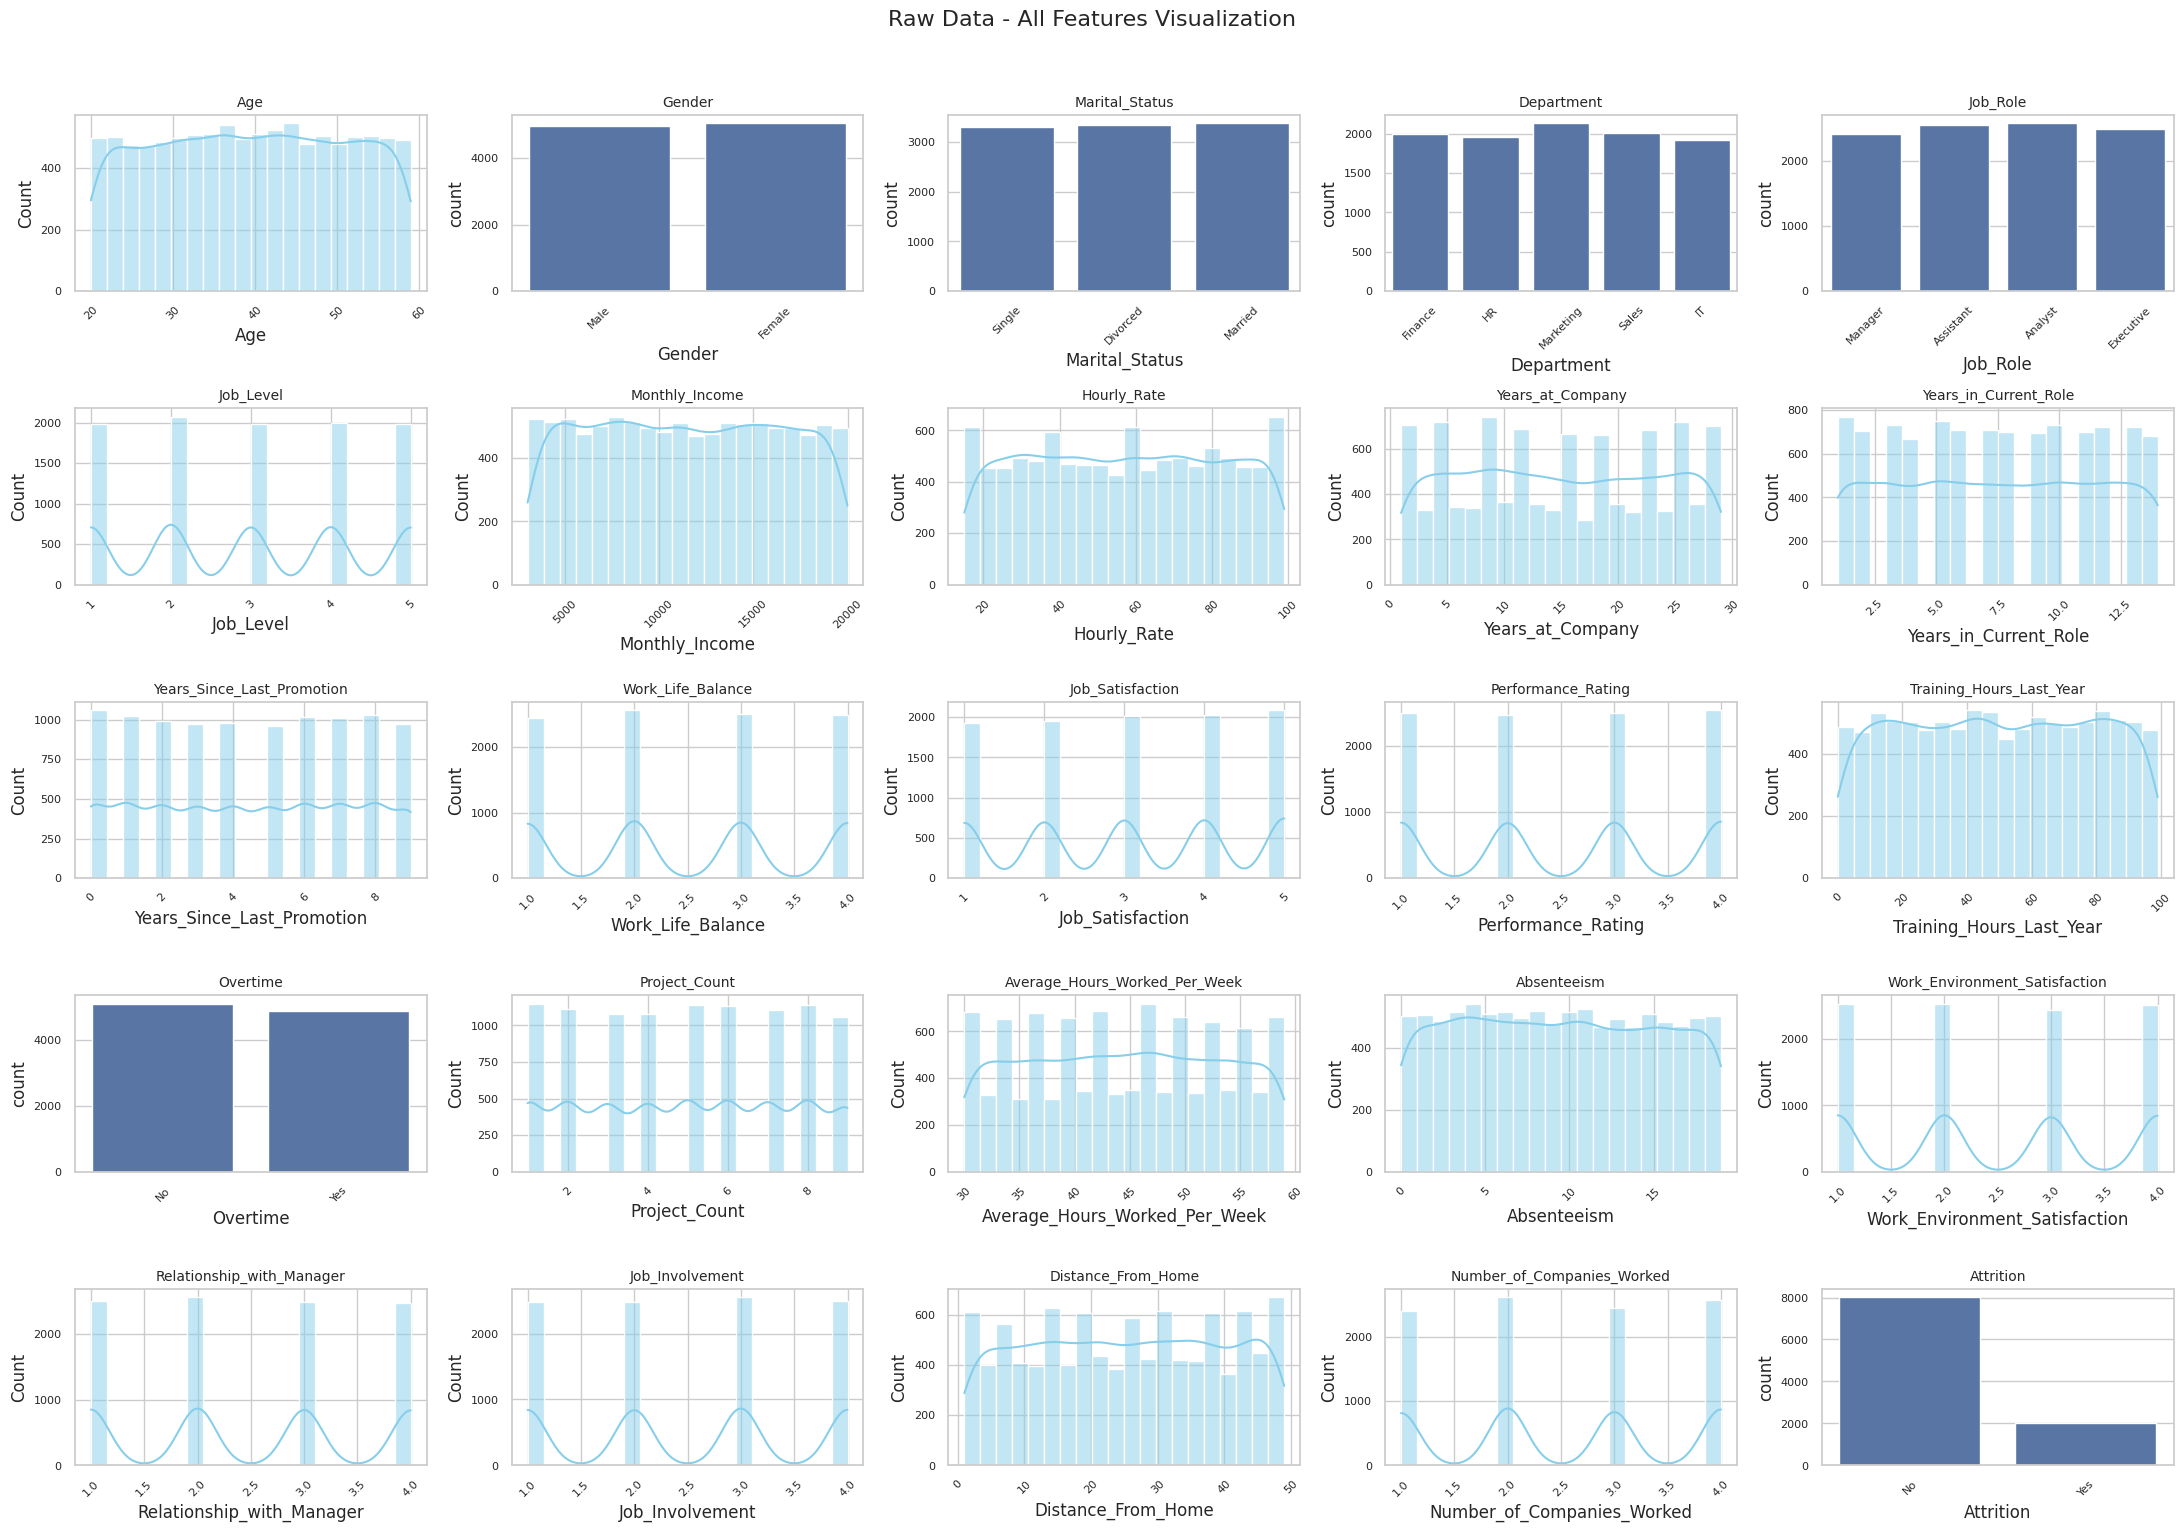

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# All features except Employee_ID
all_features = [col for col in df.columns if col != "Employee_ID"]

# Grid size
n_cols = 5
n_rows = math.ceil(len(all_features) / n_cols)

plt.figure(figsize=(22, n_rows * 3))

for i, col in enumerate(all_features, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[col].dtype in ['int64', 'float64']:
        # Numeric: histogram with KDE
        sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    else:
        # Categorical: count plot
        sns.countplot(x=df[col], hue=None)  # avoids palette warning

    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Raw Data - All Features Visualization", fontsize=16, y=1.02)
plt.show()


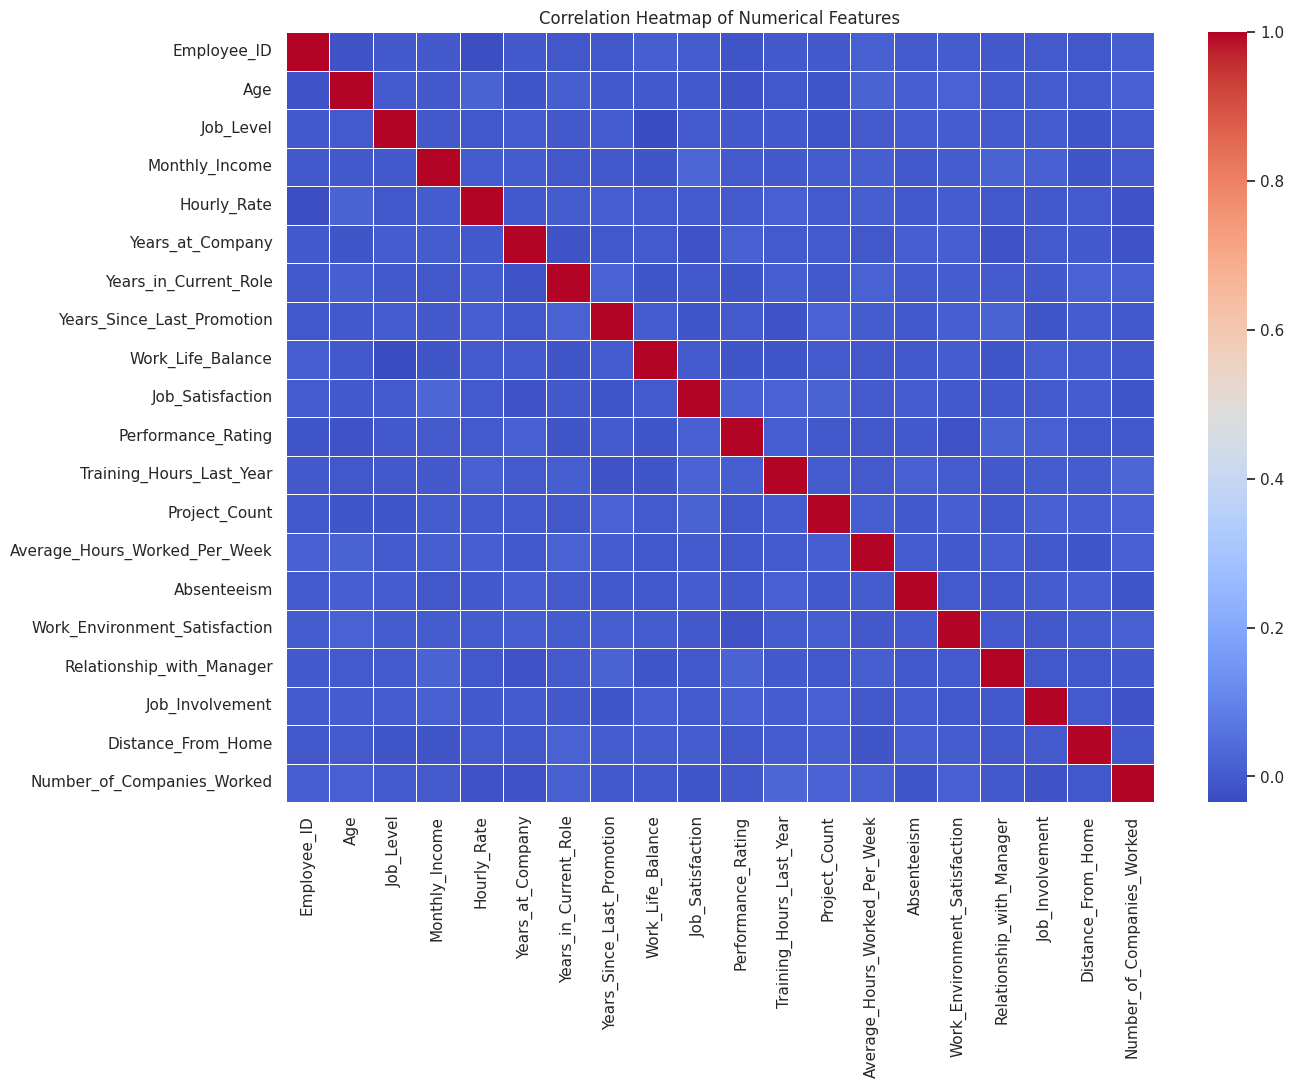

In [58]:
# Correlation Heatmap (Numerical Features)

plt.figure(figsize=(14,10))
numeric_df = df.select_dtypes(include=["int64"])
sns.heatmap(numeric_df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#Data Cleaning & Preprocessing

In [59]:
#Create Working Copy


data = df.copy()

In [60]:
# Check for Missing Values

print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


In [61]:
#  Drop Non-Predictive Identifier Column


data.drop(columns=["Employee_ID"], inplace=True)

print("Updated dataset shape after dropping Employee_ID:")
print(data.shape)


Updated dataset shape after dropping Employee_ID:
(10000, 25)


New feature

In [62]:
print(data.columns.tolist())


['Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']


In [63]:

# FEATURE ENGINEERING (NEW FEATURES)

# 1. Combined Satisfaction Score
# Mix work-life balance + environment + manager relationship + job involvement
data['Overall_Satisfaction'] = (
    data['Work_Life_Balance'] +
    data['Work_Environment_Satisfaction'] +
    data['Relationship_with_Manager'] +
    data['Job_Involvement']
)

# 2. Experience Diversity Score
# Higher companies worked + more years in role → more diverse experience
data['Experience_Diversity'] = (
    data['Number_of_Companies_Worked'] +
    data['Years_in_Current_Role']
)

# 3. Productivity_Index
# Project count weighted by job level and performance rating
data['Productivity_Index'] = (
    data['Project_Count'] *
    data['Job_Level'] *
    data['Performance_Rating']
)

# Show new feature columns
data[['Overall_Satisfaction', 'Experience_Diversity', 'Productivity_Index']].head()


,Overall_Satisfaction,Experience_Diversity,Productivity_Index
0,7,15,90
1,7,8,72
2,12,5,12
3,9,11,72
4,6,13,3


In [66]:
# -----------------------------
# NEW FEATURE ENGINEERING
# -----------------------------

# 1. Stability_Index
# Measures consistency at job vs. distance and companies worked
data['Stability_Index'] = (
    data['Years_in_Current_Role'] /
    (data['Number_of_Companies_Worked'] + 1)
) - (data['Distance_From_Home'] / 50)

# 2. Engagement_Score
# Combines involvement, performance, and manager relationship
data['Engagement_Score'] = (
    data['Job_Involvement'] * 0.4 +
    data['Performance_Rating'] * 0.3 +
    data['Relationship_with_Manager'] * 0.3
)

# Define Workload_Intensity before use
data['Workload_Intensity'] = data['Average_Hours_Worked_Per_Week']

# 3. Work_Strength
# Uses workload intensity + job level
data['Work_Strength'] = (
    data['Workload_Intensity'] * 0.7 +
    data['Job_Level'] * 0.3
)

# View first rows
data[['Stability_Index', 'Engagement_Score', 'Work_Strength']].head()

,Stability_Index,Engagement_Score,Work_Strength
0,2.02,1.3,35.1
1,3.00,1.3,41.1
2,1.58,2.7,39.7
3,2.08,2.2,38.3
4,0.94,1.6,38.1


In [67]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Strip column names just in case
data.columns = data.columns.str.strip()

# Encode target variable
le_target = LabelEncoder()
data['Attrition'] = le_target.fit_transform(data['Attrition'])
print("Target classes:", le_target.classes_)
print(data['Attrition'].value_counts())

# Identify categorical columns that currently exist
possible_categoricals = ['Gender', 'Department', 'Job_Role', 'Marital_Status', 'Overtime']
categorical_cols = [col for col in possible_categoricals if col in data.columns]
print("Columns to encode:", categorical_cols)

# Encode categorical features safely
for col in categorical_cols:
    if data[col].nunique() == 2:
        data[col] = LabelEncoder().fit_transform(data[col])
    else:
        dummies = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)

# Check encoding results
print("Columns after encoding:")
print(data.columns)



Target classes: ['No' 'Yes']
Attrition
0    8003
1    1997
Name: count, dtype: int64
Columns to encode: ['Gender', 'Department', 'Job_Role', 'Marital_Status', 'Overtime']
Columns after encoding:
Index(['Age', 'Gender', 'Job_Level', 'Monthly_Income', 'Hourly_Rate',
       'Years_at_Company', 'Years_in_Current_Role',
       'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition', 'Overall_Satisfaction', 'Experience_Diversity',
       'Productivity_Index', 'Stability_Index', 'Engagement_Score',
       'Workload_Intensity', 'Work_Strength', 'Department_Finance',
       'Department_HR', 'Department_IT', 'Department_Marketing',
       'Department_Sales', 'Job_Role_Analyst', '

In [68]:
# Save the preprocessed dataset to CSV
data.to_csv("preprocessed_dataset.csv", index=False)

print("Preprocessed dataset saved as 'preprocessed_dataset.csv'")


Preprocessed dataset saved as 'preprocessed_dataset.csv'


In [69]:
# View first 5 rows
print(data.head())



   Age  Gender  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
0   58       1          5            7332           81                24   
1   48       0          4            6069           55                18   
2   34       0          4           11485           65                 6   
3   27       0          4           18707           28                12   
4   40       1          1           16398           92                 3   

   Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  \
0                     12                           3                  1   
1                      7                           5                  1   
2                      4                           3                  4   
3                      9                           1                  1   
4                      9                           1                  3   

   Job_Satisfaction  ...  Department_IT  Department_Marketing  \
0                 3  ...   

In [70]:
# View dataset info (columns, types, non-null counts)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  int64  
 2   Job_Level                      10000 non-null  int64  
 3   Monthly_Income                 10000 non-null  int64  
 4   Hourly_Rate                    10000 non-null  int64  
 5   Years_at_Company               10000 non-null  int64  
 6   Years_in_Current_Role          10000 non-null  int64  
 7   Years_Since_Last_Promotion     10000 non-null  int64  
 8   Work_Life_Balance              10000 non-null  int64  
 9   Job_Satisfaction               10000 non-null  int64  
 10  Performance_Rating             10000 non-null  int64  
 11  Training_Hours_Last_Year       10000 non-null  int64  
 12  Overtime                       10000 non-null  

In [71]:
# Check column names
print(data.columns.tolist())

['Age', 'Gender', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition', 'Overall_Satisfaction', 'Experience_Diversity', 'Productivity_Index', 'Stability_Index', 'Engagement_Score', 'Workload_Intensity', 'Work_Strength', 'Department_Finance', 'Department_HR', 'Department_IT', 'Department_Marketing', 'Department_Sales', 'Job_Role_Analyst', 'Job_Role_Assistant', 'Job_Role_Executive', 'Job_Role_Manager', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single']


In [72]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Separate features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Compute ANOVA F-scores
f_scores, p_values = f_classif(X, y)

# Create a DataFrame for easy visualization
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'p_value': p_values
})

# Sort by F_Score descending
anova_scores = anova_scores.sort_values(by='F_Score', ascending=False)

# Display top features
print(anova_scores.head(20))


                          Feature   F_Score   p_value
36               Job_Role_Manager  7.257600  0.007072
34             Job_Role_Assistant  4.563707  0.032681
8               Work_Life_Balance  2.318541  0.127872
18                Job_Involvement  2.236368  0.134829
25               Engagement_Score  2.002497  0.157072
38         Marital_Status_Married  1.747206  0.186259
10             Performance_Rating  1.405633  0.235811
2                       Job_Level  1.303009  0.253692
19             Distance_From_Home  1.290721  0.255942
16  Work_Environment_Satisfaction  1.231115  0.267217
28             Department_Finance  1.215421  0.270288
37        Marital_Status_Divorced  1.016759  0.313314
23             Productivity_Index  1.011649  0.314533
20     Number_of_Companies_Worked  0.677312  0.410533
31           Department_Marketing  0.626219  0.428764
0                             Age  0.608005  0.435558
21           Overall_Satisfaction  0.557675  0.455216
1                          G

# Preprocessed Data Overview

In [73]:
import pandas as pd

# Load the selected dataset
file_path = '/content/preprocessed_dataset.csv'
data = pd.read_csv(file_path)


print("Dataset Shape:", data.shape)





Dataset Shape: (10000, 41)


In [74]:
#  Info
print("Dataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  int64  
 2   Job_Level                      10000 non-null  int64  
 3   Monthly_Income                 10000 non-null  int64  
 4   Hourly_Rate                    10000 non-null  int64  
 5   Years_at_Company               10000 non-null  int64  
 6   Years_in_Current_Role          10000 non-null  int64  
 7   Years_Since_Last_Promotion     10000 non-null  int64  
 8   Work_Life_Balance              10000 non-null  int64  
 9   Job_Satisfaction               10000 non-null  int64  
 10  Performance_Rating             10000 non-null  int64  
 11  Training_Hours_Last_Year       10000 non-null  int64  
 12  Overtime                       10

In [75]:

# 3 Statistical Description
print("Dataset Description (Numeric Stats):")
print(data.describe().T)  # Transposed for easier reading


Dataset Description (Numeric Stats):
                                 count          mean          std      min  \
Age                            10000.0     39.561800    11.454986    20.00   
Gender                         10000.0      0.495800     0.500007     0.00   
Job_Level                      10000.0      2.990800     1.410643     1.00   
Monthly_Income                 10000.0  11436.716700  4926.528302  3000.00   
Hourly_Rate                    10000.0     57.032300    24.703261    15.00   
Years_at_Company               10000.0     14.936200     8.431657     1.00   
Years_in_Current_Role          10000.0      7.451300     4.042903     1.00   
Years_Since_Last_Promotion     10000.0      4.471900     2.891617     0.00   
Work_Life_Balance              10000.0      2.502400     1.112348     1.00   
Job_Satisfaction               10000.0      3.038000     1.414764     1.00   
Performance_Rating             10000.0      2.507700     1.120833     1.00   
Training_Hours_Last_Year   

In [76]:
# First 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
   Age  Gender  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  \
0   58       1          5            7332           81                24   
1   48       0          4            6069           55                18   
2   34       0          4           11485           65                 6   
3   27       0          4           18707           28                12   
4   40       1          1           16398           92                 3   
5   58       1          3            7305           63                25   
6   38       1          5           15697           63                 3   
7   42       0          1           14506           41                16   
8   30       0          4           18105           95                17   
9   30       1          4           15745           53                16   

   Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  \
0                     12                           3      

#Visualize Preprocessed Data

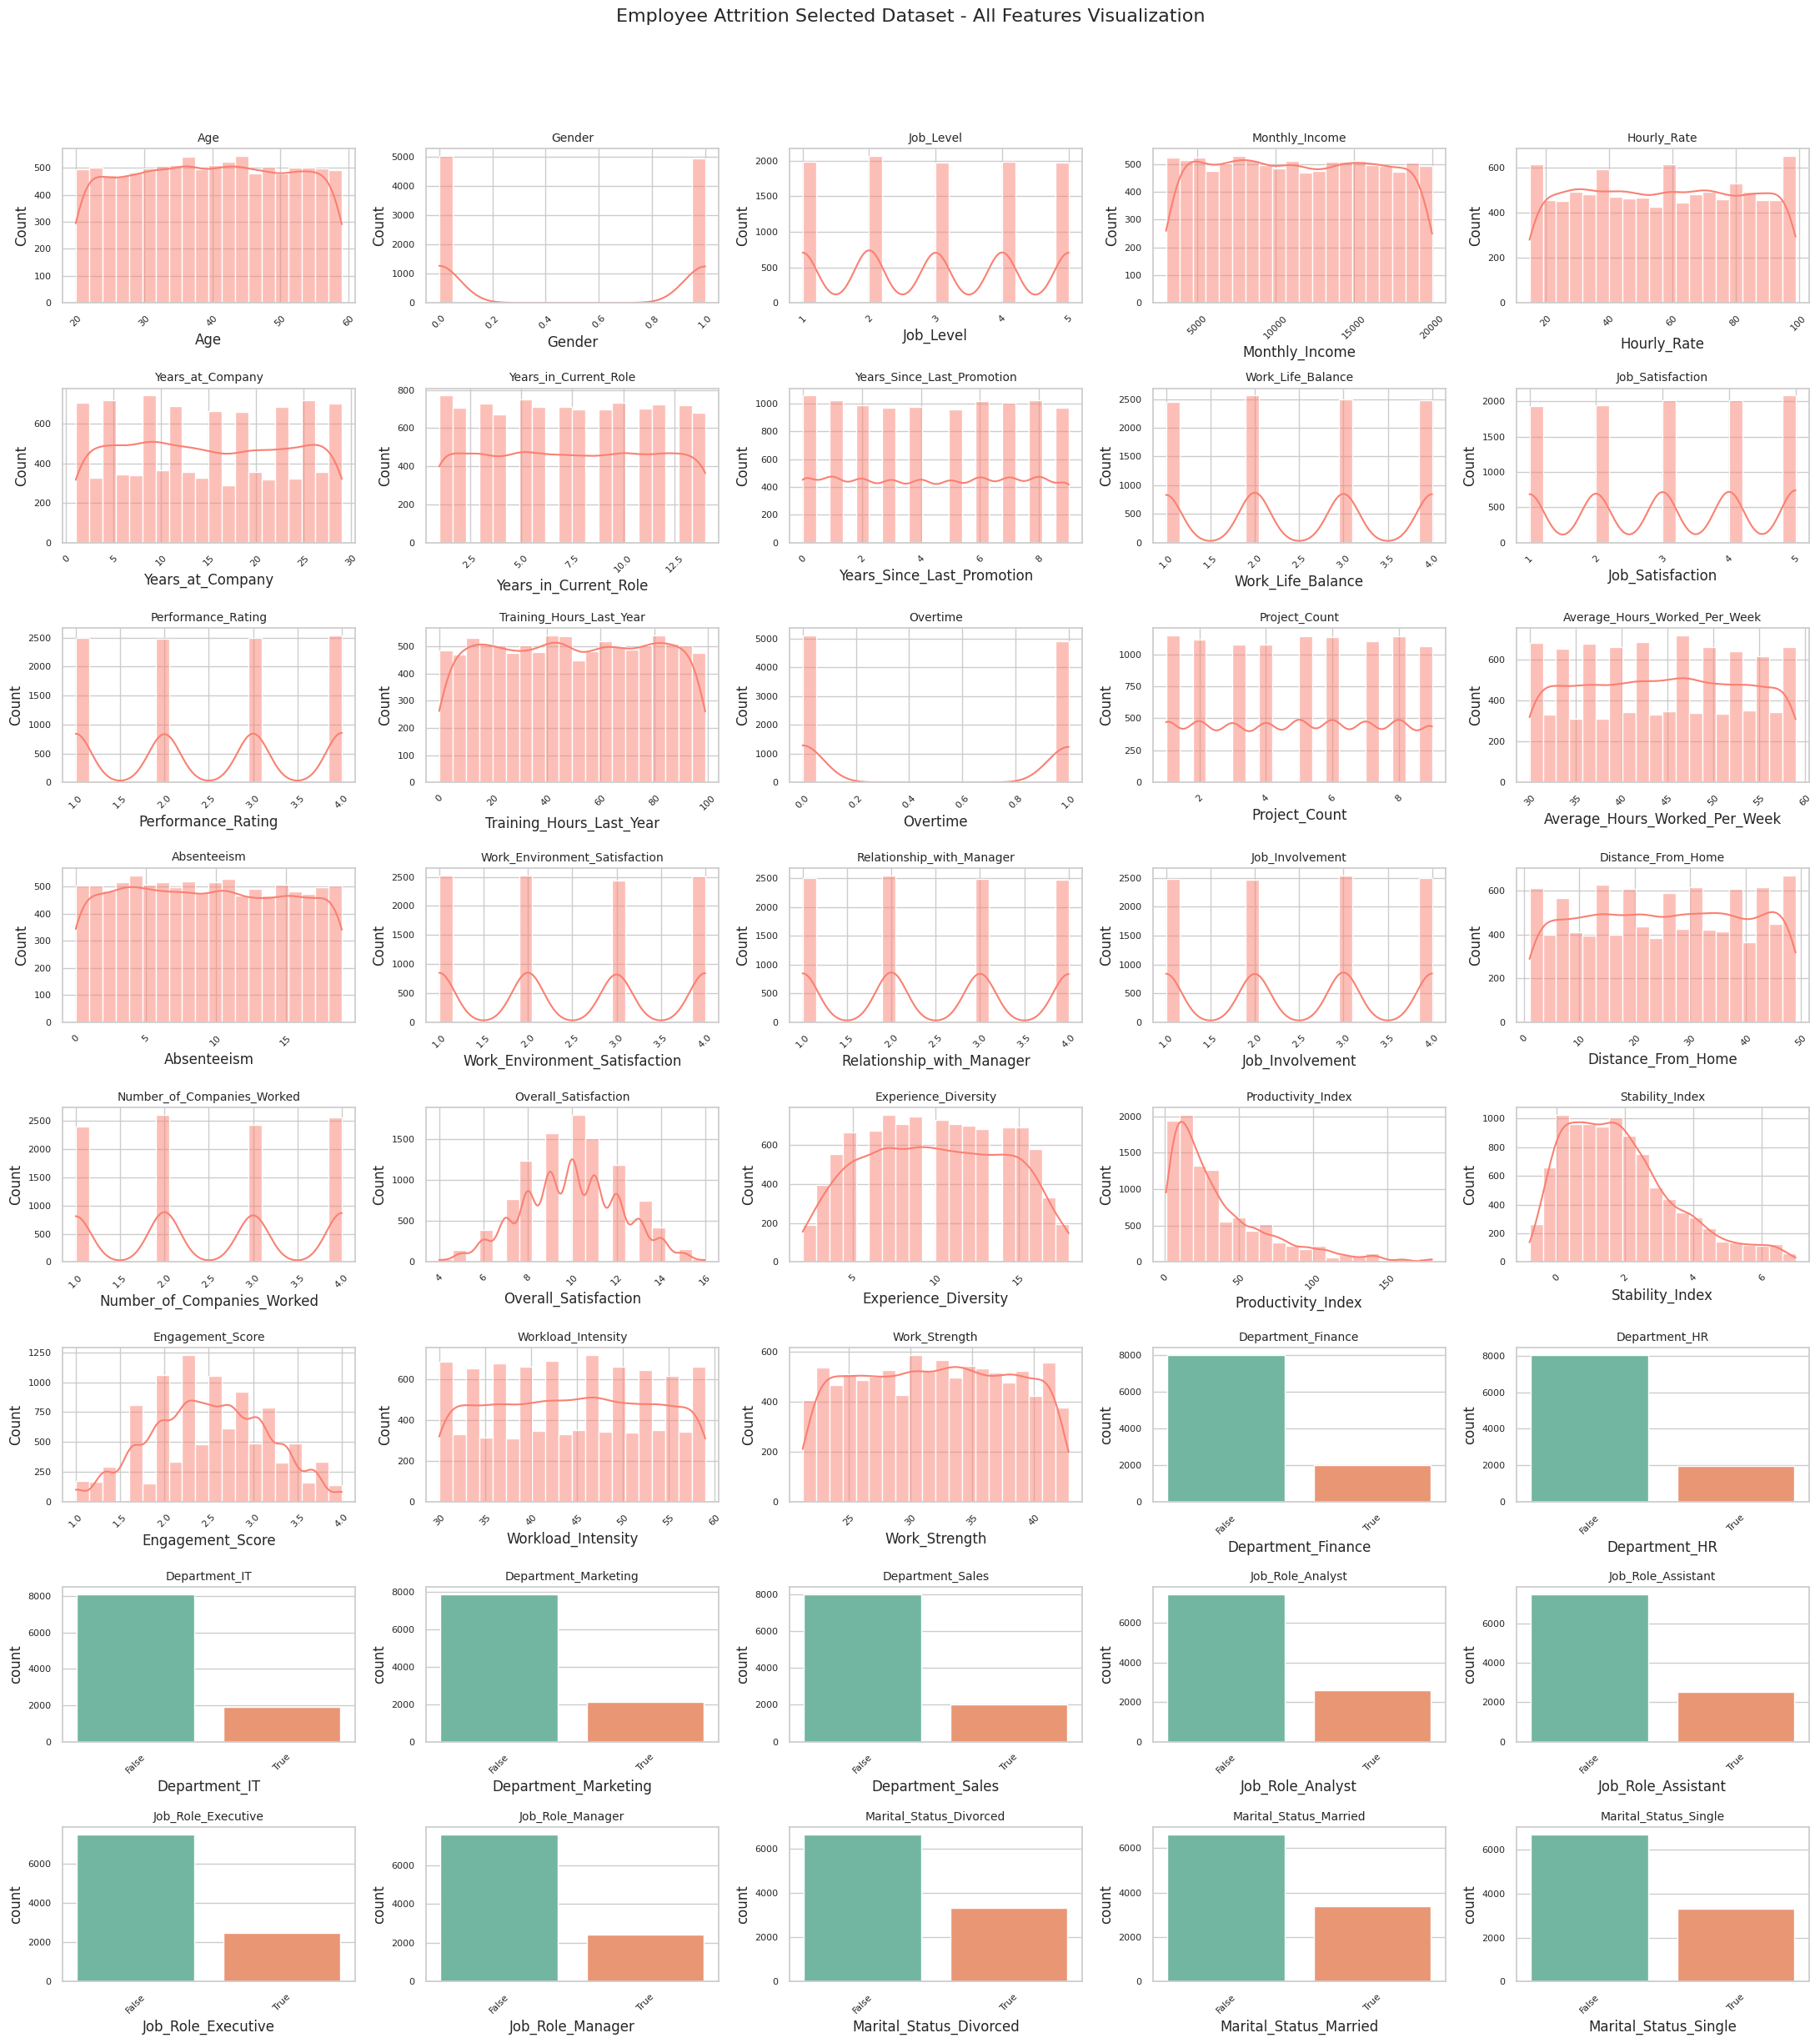

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the selected dataset
data = pd.read_csv("/content/preprocessed_dataset.csv")



# Features excluding target if needed
pre_features = [col for col in data.columns if col != "Attrition"]

# Grid size for plots
n_cols = 5
n_rows = math.ceil(len(pre_features) / n_cols)
plt.figure(figsize=(22, n_rows * 3))

for i, col in enumerate(pre_features, 1):
    plt.subplot(n_rows, n_cols, i)

    if data[col].dtype in ['int64', 'float64']:
        # Numeric: histogram + KDE
        sns.histplot(data[col], bins=20, kde=True, color='salmon')
    else:
        # Categorical: count plot
        sns.countplot(x=data[col], hue=None, palette='Set2')

    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Employee Attrition Selected Dataset - All Features Visualization", fontsize=16, y=1.02)
plt.show()


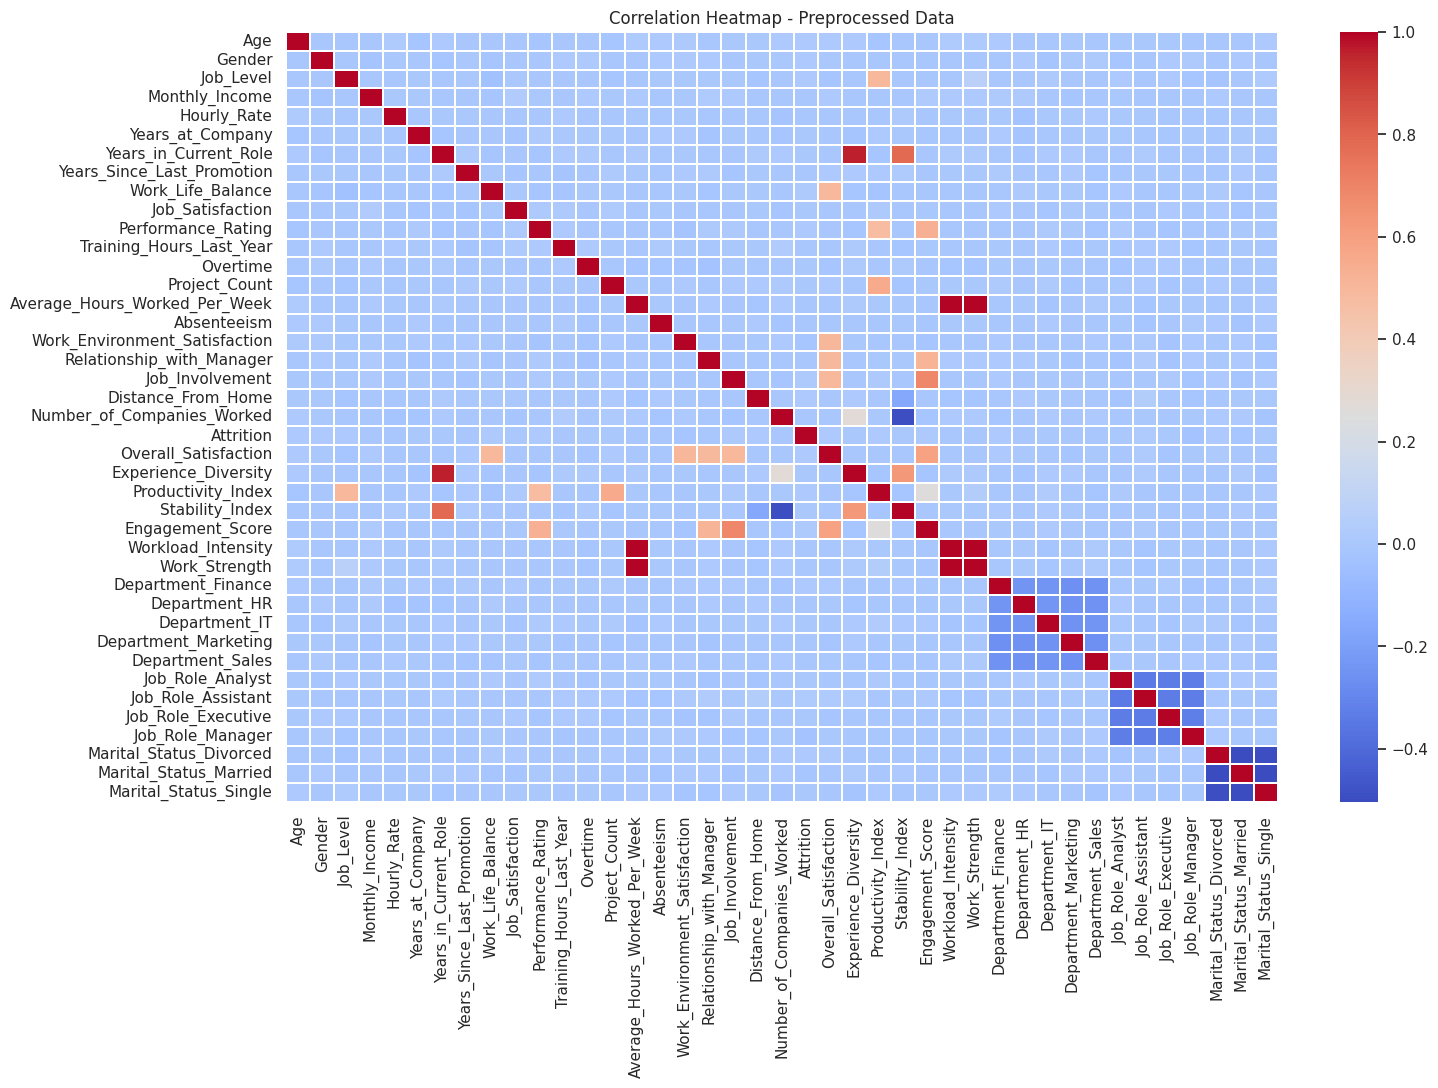

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap of preprocessed features
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.2)
plt.title("Correlation Heatmap - Preprocessed Data")
plt.show()


#Compare Before vs After Preprocessing

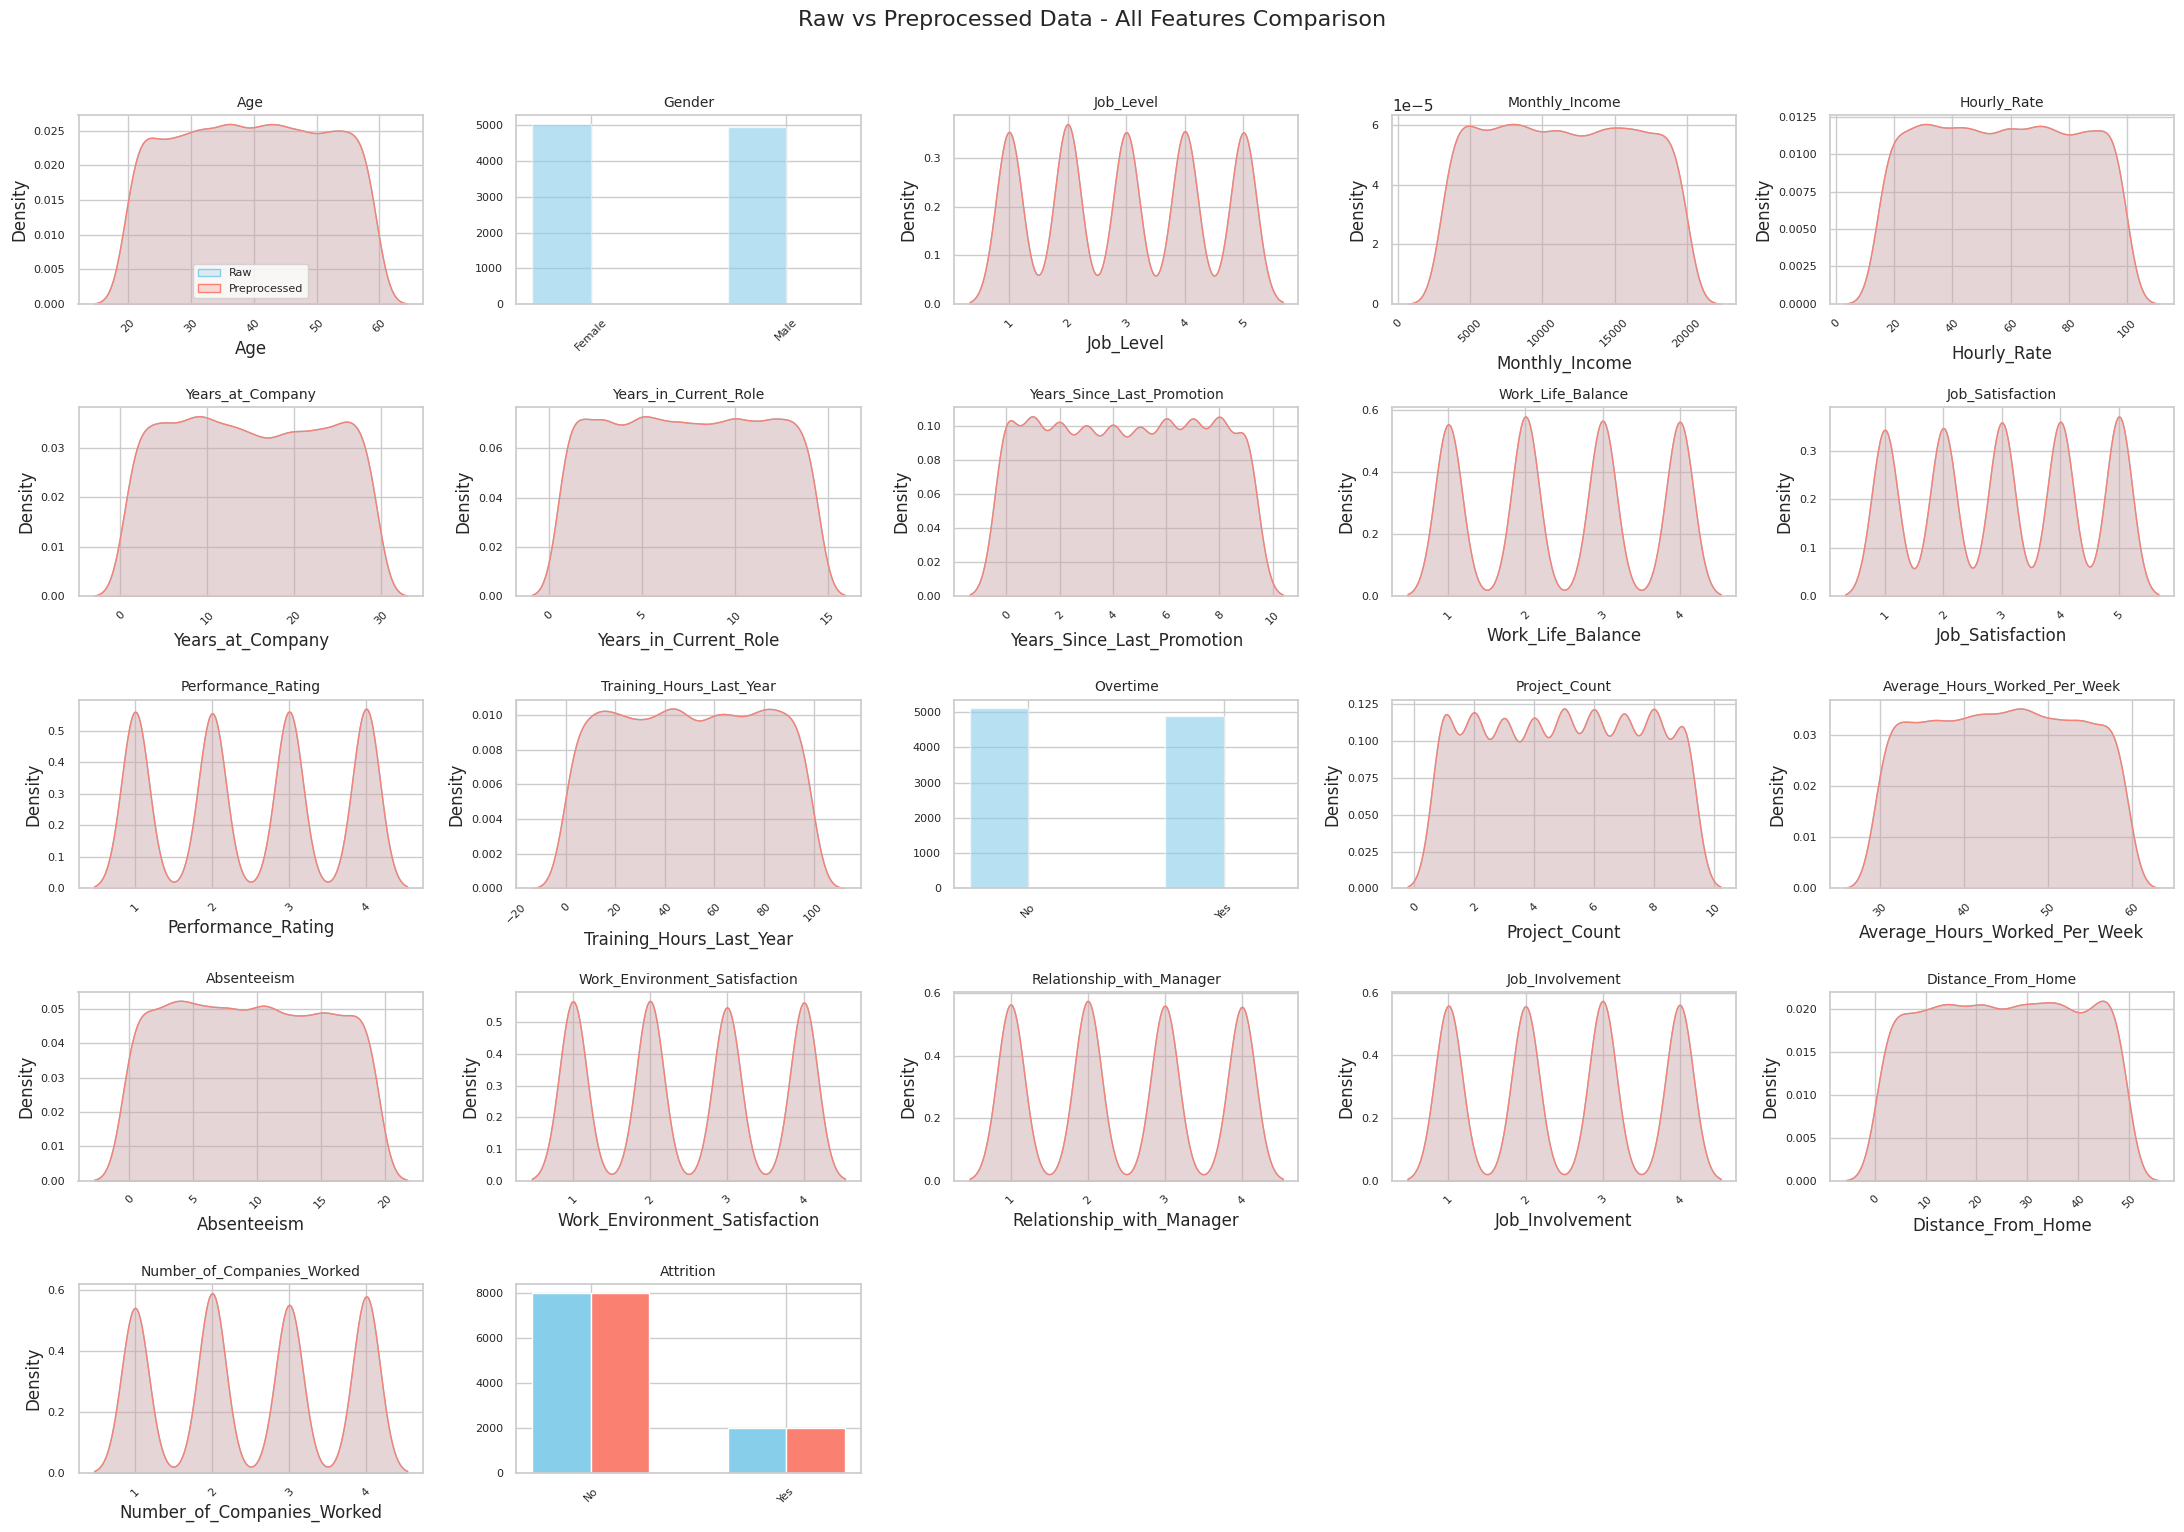

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")

# Load datasets
raw_path = "/content/Main raw dataset.csv"
preprocessed_path = "/content/preprocessed_dataset.csv"

df = pd.read_csv(raw_path)       # raw dataset
data = pd.read_csv(preprocessed_path)  # preprocessed/final dataset

# Columns present in both datasets
common_features = [col for col in df.columns if col in data.columns and col != "Employee_ID"]

# Grid size
n_cols = 5
n_rows = math.ceil(len(common_features) / n_cols)
plt.figure(figsize=(22, n_rows * 3))

for i, col in enumerate(common_features, 1):
    plt.subplot(n_rows, n_cols, i)

    if col == "Attrition":
        raw_attrition = df[col].map({"Yes": 1, "No": 0})
        raw_counts = raw_attrition.value_counts().sort_index()
        pre_counts = data[col].value_counts().reindex(raw_counts.index, fill_value=0)
        plt.bar(raw_counts.index - 0.15, raw_counts.values, width=0.3, color='skyblue', label='Raw')
        plt.bar(pre_counts.index + 0.15, pre_counts.values, width=0.3, color='salmon', label='Preprocessed')
        plt.xticks([0, 1], ['No', 'Yes'])

    elif df[col].dtype in ['int64', 'float64']:
        sns.kdeplot(df[col], fill=True, color='skyblue', label='Raw')
        sns.kdeplot(data[col], fill=True, color='salmon', label='Preprocessed')

    else:
        raw_counts = df[col].value_counts().sort_index()
        pre_counts = data[col].value_counts().reindex(raw_counts.index, fill_value=0)
        x = range(len(raw_counts))
        plt.bar([p - 0.15 for p in x], raw_counts.values, width=0.3, color='skyblue', alpha=0.6, label='Raw')
        plt.bar([p + 0.15 for p in x], pre_counts.values, width=0.3, color='salmon', alpha=0.6, label='Preprocessed')
        plt.xticks(x, raw_counts.index, rotation=45)

    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)

    if i == 1:
        plt.legend(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Raw vs Preprocessed Data - All Features Comparison", fontsize=16, y=1.02)
plt.show()


In [86]:
import pandas as pd
import numpy as np

def compare_preprocessing(raw_df, preprocessed_df):
    # Only consider common features
    common_features = [col for col in raw_df.columns if col in preprocessed_df.columns]

    print("Comparison Report\n" + "-"*40)

    for col in common_features:
        print(f"\nFeature: {col}")

        # Numeric columns
        if raw_df[col].dtype in ['int64', 'float64'] and preprocessed_df[col].dtype in ['int64', 'float64']:
            raw_mean, raw_std = raw_df[col].mean(), raw_df[col].std()
            pre_mean, pre_std = preprocessed_df[col].mean(), preprocessed_df[col].std()
            mean_diff = pre_mean - raw_mean
            std_diff = pre_std - raw_std

            print(f"Raw Mean: {raw_mean:.2f}, Std: {raw_std:.2f}")
            print(f"Preprocessed Mean: {pre_mean:.2f}, Std: {pre_std:.2f}")
            print(f"Difference -> Mean: {mean_diff:.2f}, Std: {std_diff:.2f}")

        # Categorical / boolean columns
        else:
            raw_counts = raw_df[col].value_counts(normalize=True)
            pre_counts = preprocessed_df[col].value_counts(normalize=True)
            combined = pd.concat([raw_counts, pre_counts], axis=1, keys=['Raw', 'Preprocessed']).fillna(0)
            combined['Diff'] = combined['Preprocessed'] - combined['Raw']
            print("Category distribution comparison:")
            print(combined)

# Usage
raw_df = pd.read_csv("/content/Main raw dataset.csv")
pre_df = pd.read_csv("/content/preprocessed_dataset.csv")

compare_preprocessing(raw_df, pre_df)


Comparison Report
----------------------------------------

Feature: Age
Raw Mean: 39.56, Std: 11.45
Preprocessed Mean: 39.56, Std: 11.45
Difference -> Mean: 0.00, Std: 0.00

Feature: Gender
Category distribution comparison:
           Raw  Preprocessed    Diff
Gender                              
Female  0.5042        0.0000 -0.5042
Male    0.4958        0.0000 -0.4958
0       0.0000        0.5042  0.5042
1       0.0000        0.4958  0.4958

Feature: Job_Level
Raw Mean: 2.99, Std: 1.41
Preprocessed Mean: 2.99, Std: 1.41
Difference -> Mean: 0.00, Std: 0.00

Feature: Monthly_Income
Raw Mean: 11436.72, Std: 4926.53
Preprocessed Mean: 11436.72, Std: 4926.53
Difference -> Mean: 0.00, Std: 0.00

Feature: Hourly_Rate
Raw Mean: 57.03, Std: 24.70
Preprocessed Mean: 57.03, Std: 24.70
Difference -> Mean: 0.00, Std: 0.00

Feature: Years_at_Company
Raw Mean: 14.94, Std: 8.43
Preprocessed Mean: 14.94, Std: 8.43
Difference -> Mean: 0.00, Std: 0.00

Feature: Years_in_Current_Role
Raw Mean: 7.45, Std

#Train-Test

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
data = pd.read_csv("/content/preprocessed_dataset.csv")

# Separate features and target
X = data.drop(columns=["Attrition"])
y = data["Attrition"]

# Stratified split to maintain class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine features + target for saving
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save to CSV
train_df.to_csv("train_Employee_Attrition.csv", index=False)
test_df.to_csv("test_Employee_Attrition.csv", index=False)

# Check sizes and target distribution
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain Attrition distribution:\n", train_df["Attrition"].value_counts(normalize=True))
print("\nTest Attrition distribution:\n", test_df["Attrition"].value_counts(normalize=True))


Train shape: (8000, 41)
Test shape: (2000, 41)

Train Attrition distribution:
 Attrition
0    0.80025
1    0.19975
Name: proportion, dtype: float64

Test Attrition distribution:
 Attrition
0    0.8005
1    0.1995
Name: proportion, dtype: float64
